<a href="https://colab.research.google.com/github/gibsonea/Biostats/blob/main/LabSolutions/Solutions06_Intro_to_Random_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a name="06intro">2.3: Introduction to Random Variables </a>

---


## <a name="05hits">Importing the Spotify Hits Data Set</a>

---

The data set *spotify-hits.csv*<sup>1</sup> contains audio statistics of the top 2000 tracks on Spotify from 2000-2019. The data is
stored in a <font color="dodgerblue">**comma separated file (csv)**</font>. We can use the function `read.csv()` to import the csv file into an
    R data frame we call `hits`.

<font size=2>1. ["Top Hits Spotify from 2000-2019"](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019) from [Kaggle](https://www.kaggle.com).

In [ ]:
hits <- read.csv("https://raw.githubusercontent.com/CU-Denver-MathStats-OER/Statistical-Theory/main/Data/spotify-hits.csv")

### <a name="05clean">Cleaning the Music Data Set</a>

---

In the code cell below:

-   We convert `artist`, `song`, and `genre` to categorical variables
    using the `factor()` function.
-   Extract the variables `artist`, `song`, `tempo` and `genre`
    (ignoring the rest).
-   Print the first 6 rows to screen to get a glimpse of the resulting
    data frame.

In [ ]:
hits$artist <- factor(hits$artist)  # artist is categorical
hits$song <- factor(hits$song)  # song is categorical
hits$genre <- factor(hits$genre)  # genre is categorical
hits <- hits[,c("artist", "song", "tempo", "genre")]
head(hits)  # display first 6 rows of data frame

,artist,song,tempo,genre
,<fct>,<fct>,<dbl>,<fct>
1,Britney Spears,Oops!...I Did It Again,95.053,pop
2,blink-182,All The Small Things,148.726,"rock, pop"
3,Faith Hill,Breathe,136.859,"pop, country"
4,Bon Jovi,It's My Life,119.992,"rock, metal"
5,*NSYNC,Bye Bye Bye,172.656,pop
6,Sisqo,Thong Song,121.549,"hip hop, pop, R&B"


## <a name="05q1">Question 1</a>

---

Explore the data set `hits`. For example:

-   How many observations are in the data set?
-   Which artist had the most hits?
-   What is the mean tempo?
-   Create a plot to display the distribution of tempos.
-   What genre occurs most frequently?

### <a name="05ans1">Solution to Question 1</a>

---


-   Therre are 2000 observations (songs) in the data set.
-   Rihanna
-   The mean tempo is $120.12$ beats per minute.
-   See below for a histogram and a boxplot.
-   The **pop** genre is the most frequent.


In [ ]:
str(hits)

'data.frame':	2000 obs. of  4 variables:
 $ artist: Factor w/ 835 levels "*NSYNC","112",..: 123 105 258 115 1 696 243 643 202 538 ...
 $ song  : Factor w/ 1879 levels "...Ready For It?",..: 1188 73 230 825 250 1655 1622 1321 1365 875 ...
 $ tempo : num  95.1 148.7 136.9 120 172.7 ...
 $ genre : Factor w/ 59 levels "country","country, latin",..: 24 48 25 47 24 16 8 34 31 3 ...


In [ ]:
summary(hits)

            artist          song          tempo       
 Rihanna       :  25   Sorry  :   5   Min.   : 60.02  
 Drake         :  23   Breathe:   3   1st Qu.: 98.99  
 Eminem        :  21   Closer :   3   Median :120.02  
 Calvin Harris :  20   Don't  :   3   Mean   :120.12  
 Britney Spears:  19   Faded  :   3   3rd Qu.:134.27  
 David Guetta  :  18   Higher :   3   Max.   :210.85  
 (Other)       :1874   (Other):1980                   
                   genre    
 pop                  :428  
 hip hop, pop         :277  
 hip hop, pop, R&B    :244  
 pop, Dance/Electronic:221  
 pop, R&B             :178  
 hip hop              :124  
 (Other)              :528  

In [ ]:
sort(table(hits$artist), decreasing = TRUE)


                                  Rihanna 
                                       25 
                                    Drake 
                                       23 
                                   Eminem 
                                       21 
                            Calvin Harris 
                                       20 
                           Britney Spears 
                                       19 
                             David Guetta 
                                       18 
                              Chris Brown 
                                       17 
                               Kanye West 
                                       17 
                                  Beyoncé 
                                       16 
                               Katy Perry 
                                       16 
                             Taylor Swift 
                                       16 
                                     P!nk 
          

In [ ]:
max(table(hits$artist))

[1] 25

In [ ]:
mean(hits$tempo)

[1] 120.1226

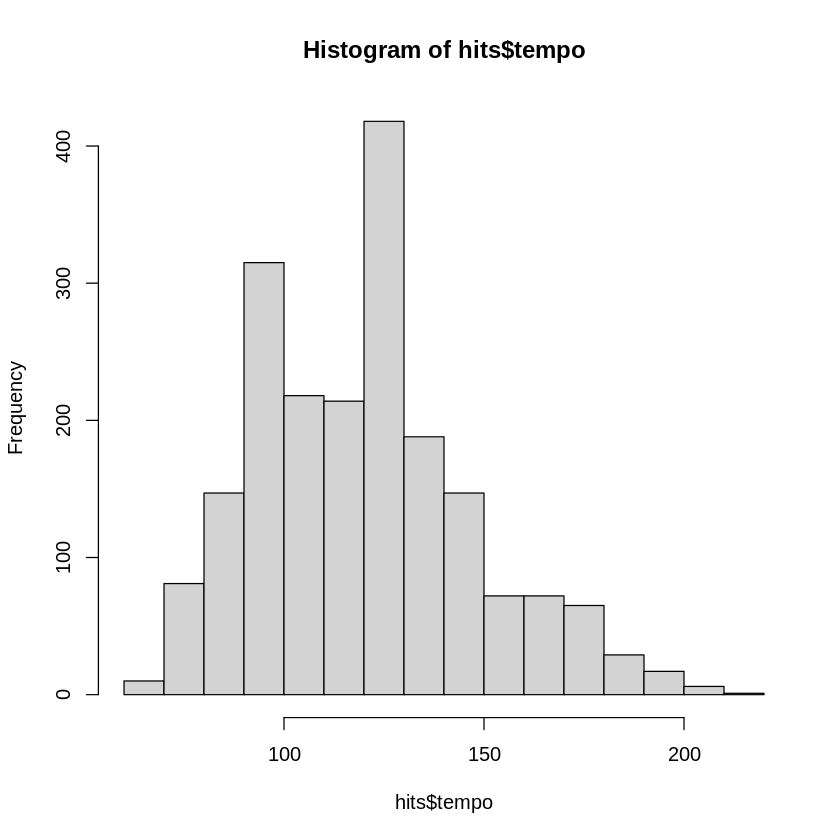

In [ ]:
hist(hits$tempo)

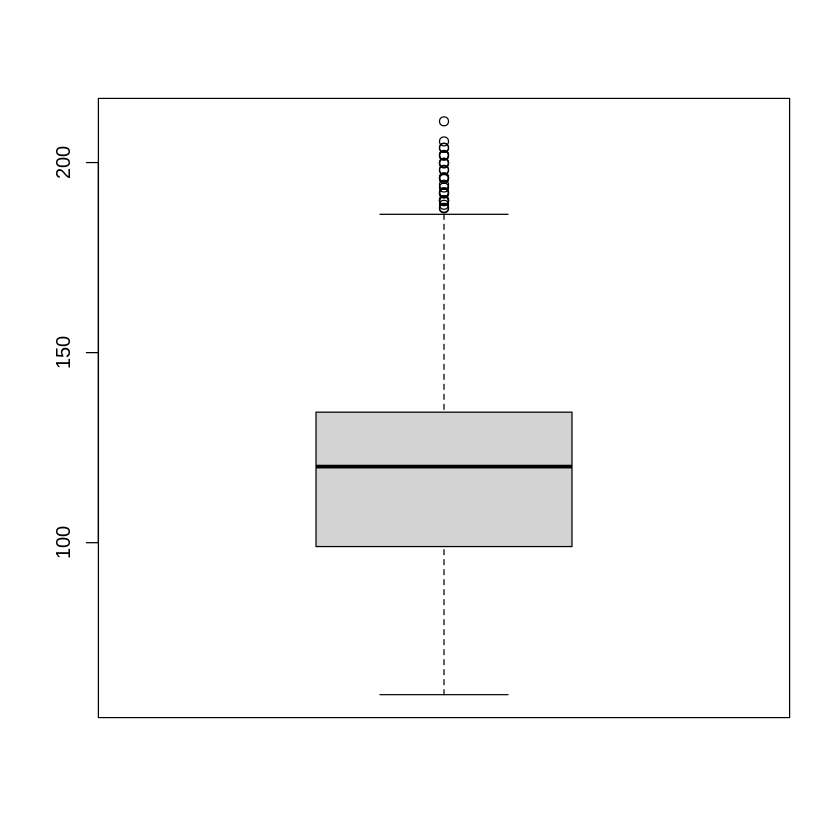

In [ ]:
boxplot(hits$tempo)

In [ ]:
sort(table(hits$genre), decreasing = TRUE)


                                  pop                          hip hop, pop 
                                  428                                   277 
                    hip hop, pop, R&B                 pop, Dance/Electronic 
                                  244                                   221 
                             pop, R&B                               hip hop 
                                  178                                   124 
       hip hop, pop, Dance/Electronic                                  rock 
                                   78                                    58 
                            rock, pop                      Dance/Electronic 
                                   43                                    41 
                          rock, metal                            pop, latin 
                                   38                                    28 
                            pop, rock                                 set()

## <a name="05playlist">Creating a Random Playlist</a>

---

To create a random playlist of five songs from the `hits` library of
songs, we can run the code cell below.

-   The `sample()` function below has three inputs:
    -   The “population” we will be sampling from.
        -   `nrow(hits)` returns the value 2000, the total number of
            observations (rows) in the data frame.
    -   The `size` is the number of observations we will select.
    -   The `replace =TRUE` options means we sample with replacement.
        Each time we pick a song, we place it back into the population
        and can select it in our playlist again.
    -   Run `?sample` for more information.
-   We save the selected songs to the object called `playlist`.
-   We print the list of songs in `playlist` to the screen

In [ ]:
# index contains the 5 randomly selected songs
index <- sample(nrow(hits), size=5, replace = TRUE)
index
playlist <- hits[index,]  # save each song from index to a playlist
head(playlist)  # print the playlist

[1]  409  623  422   67 1575

,artist,song,tempo,genre
,<fct>,<fct>,<dbl>,<fct>
409,O-Zone,Dragostea Din Tei,130.103,pop
623,Chris Brown,Gimme That,87.165,"hip hop, pop, R&B"
422,Mario Winans,I Don't Wanna Know (feat. Enya & P. Diddy) - 2016 Remaster,97.007,pop
67,Red Hot Chili Peppers,Otherside,123.229,rock
1575,Sam Smith,"Writing's On The Wall - From ""Spectre"" Soundtrack",81.418,pop


# <a name="05rv">Random Variables</a>

---

> How likely is it that none of the songs are classified in the genre
> “pop”? How likely is it that at most three songs are classified in the
> genre “pop”?

How can we connect these questions about our data to the concepts of
sample spaces and events to answer these question? The link can be made
using <font color="dodgerblue">**random variables**</font>!



## <a name="05def-rv">Definition of a Random Variable</a>

---

A <font color="dodgerblue">**random variable**</font> is a function that
maps each outcome $\omega$ in the sample space $\Omega$ to a real number
$X(\omega)$.

$$ X: \Omega \to \mathbb{R} $$

In the music playlist example, each playlist is a different outcome in
the sample space. There are a total of $2000^5 = 3.2 \times 10^{16}$
possible playlists in the sample space.

-   We can define random variable $X$ to be the number of songs in the
    playlist from the pop genre.
    -   For example, we could randomly select 5 songs with genres
        $\omega =$ (hip hop, country, pop, rock, pop)
    -   Random variable $X$ is $X(\omega) = 2$ since there are 2 pop
        songs in the playlist.
-   The set of possible values for $X$ is the <font color="dodgerblue">**discrete**</font> set $\left\{ 0, 1, 2, 3, 4, 5 \right\}$.



### <a name="05count-pop">Counting Pop Songs</a>

---

One potential tricky issue with song genre is many songs are classified
in multiple genres. The blink-182 song *All The Small Things* is in both
the pop and rock genres. To simplify the analysis here, we will count
songs that are only classified in pop genre (and no other genres). We
will not count *All The Small Things* as a pop song since it is also
classified as rock.

In [ ]:
sum(hits$genre == "pop")  # counts number of songs classified as only pop

[1] 428

-   The `hits` data frame contains 428 pop songs.
-   The proportion of all songs that are pop songs is $\frac{428}{2000} = 0.214$ or $21.4\%$.



## <a name="05q2">Question 2</a>

---

If $21.4\%$ of all the songs are classified solely in the genre pop:

-   Compute $P(X=0)$, the probability of picking (with replacement) a
    random playlist of 5 songs that contains no pop songs.
-   Compute $P(X=5)$, the probability of picking (with replacement) a
    random playlist of 5 songs all of which are pop songs.

You can use an R code cell to help with the calculation.

In [ ]:
# P(X = 0)
(1-0.214) * (1-0.214) * (1-0.214) * (1-0.214) * (1-0.214)

# P(X=5)
(0.214) * (0.214) * (0.214) * (0.214) * (0.214)

[1] 0.2999941

[1] 0.0004488166

### <a name="05ans2">Solution to Question 2</a>

---

- $P(X=0) = (1-0.214)^5 \approx 0.3$

- $P(X=5) = (0.214)^5 \approx 0.0004$

<br>



# <a name="05dist">Distributions for Discrete Random Variables</a>

---

If $X$ is a <font color="dodgerblue">**discrete**</font> random
variable, we define the probability function or
<font color="dodgerblue">**probability distribution**</font> or
<font color="dodgerblue">**probability mass function (pmf)**</font> for
$X$ by

$$\color{dodgerblue}{P(X=x) = p(x)}.$$

If $X$ is a discrete random variable, we define the
<font color="dodgerblue">**cumulative distribution function
(cdf)**</font> as the function

$$\color{dodgerblue}{F(x)=P(X \leq x) = \sum_{k=\rm{min \ value}}^x p(x) }.$$



## <a name="05dist-pop">The PMF and CDF for the Number of Pop Songs</a>

---

In the case of counting the number of pop songs in a 5 song playlist, we
can organize the values of the pmf $P(X=x)$ in a table.


| <font size=3>$x$</font> | <font size=3>0</font>| <font size = 3>1</font> | <font size=3>2</font> | <font size=3>3</font> | <font size=3>4</font> | <font size=3>5</font> |
|--------|--------|--------|--------|--------|--------|--------|
| <font size=3>$P(X=x)$</font> | <font size=3>$0.3000$</font> | <font size=3>$0.4084$</font> | <font size=3>$0.2224$</font> | <font size=3>$0.0606$</font> | <font size=3>$0.0082$</font> | <font size=3>$0.0004$</font> |
</font>

From the pmf table above, we have the corresponding cdf below.

| <font size=3>$x$</font>| <font size=3>0</font> | <font size=3>1</font> | <font size=3>2</font> | <font size=3>3</font>  | <font size=3>4</font> | <font size=3>5</font> |
|--------|--------|--------|--------|--------|--------|-----|
| <font size=3>$F(x)$</font> | <font size=3>$0.3000$</font> | <font size=3>$0.7084$</font> | <font size=3>$0.9308$</font> | <font size=3>$0.9914$</font> | <font size=3>$0.9996$</font> | <font size=3>$1$</font>   |



## <a name=“05q3”>Question 3</a>

---

Interpret the practical meaning of $p(3) = 0.0606$ and $F(3) = 0.9914$.

### <a name="05ans3">Solution to Question 3</a>

---

- $p(3) = 0.0606$ means there is a 6.06% chance of randomly selecting a playlist (with replacement) that has exactly 3 pops songs.

- $F(3) = 0.9914$ means there is a 99.14% chance of randomly selecting a playlist (with replacement) that has at most 3 pops songs.


<br>



## <a name=“05q4”>Question 4</a>

---

What is the probability of picking a playlist with at least 3 pop songs?

### <a name="05ans4">Solution to Question 4</a>

---

We have

$$P(X \geq 3) = 1 - P(X \leq 2) = 1 - F(2) = 1- 0.9308 = 0.0692.$$

<br> <br> <br>



In [ ]:
1-0.9308

[1] 0.0692

### <a name="05plot-discrete">Plotting Distribution Functions</a>

---

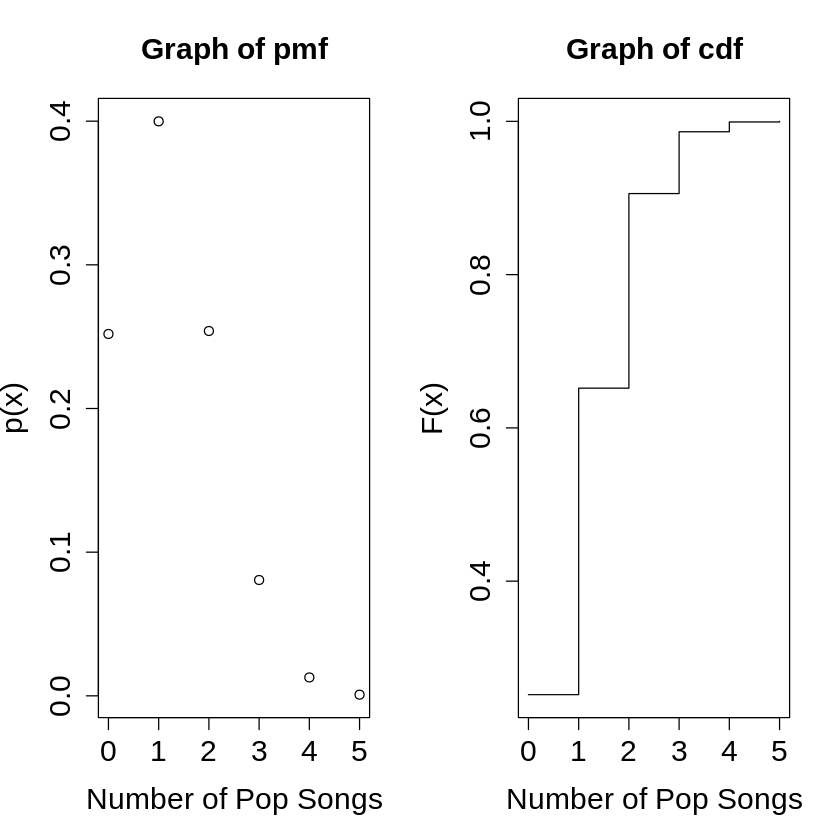

In [ ]:
n <- 5  # set number of trials n
p <- 0.241  # prob of success in a trial
x <- 0:n  # vector from 0 to n

par(mfrow=c(1, 2))
plot(x, dbinom(x, size = n, prob = p),
        main = "Graph of pmf",
        xlab = "Number of Pop Songs",
        ylab = "p(x)",
        cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels
plot(x, pbinom(x, size = n, prob = p),
        type="s",
        main = "Graph of cdf",
        xlab = "Number of Pop Songs",
        ylab = "F(x)",
        cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels

## <a name="05q5">Question 5</a>

---

Let $X$ be a discrete random variable with pmf and cdf denoted $p(x)$
and $F(x)$, respectively. Determine if each statement is True or False.

a.  $0 \leq p(x) \leq 1$ for all $x$.

b.  $0 \leq F(x) \leq 1$ for all $x$.

c.  $\displaystyle \sum_{\rm{all}\  x} p(x) = 1$.

d.  $\displaystyle \sum_{\rm{all}\  x} F(x) = 1$.

e.  $\displaystyle \lim_{x \to x_{max}} p(x) = 1$.

f.  $\displaystyle \lim_{x \to x_{max}} F(x) = 1$.

g.  The pmf must be a nondecreasing function.

h.  The cdf must be a nondecreasing function.

### <a name="05sol5">Solution to Question 5</a>

---

List the properties (a)-(h) that are indeed TRUE.

- Properties (a), (b), (c), (f), and (h) are always true.
- Property (d) is false (unless $X$ has only one possible value).
- Property (e) is false (unless $X$ has only one possible value).
- Property (g) is false. The previous example is one such counter example since the pmf in above is increasing and decreasing.

<br>



# <a name="05cont-rv">Continuous Random Variables</a>

---

Discrete random variables map outcomes in the sample space to integers.
In many situations we would like to consider mapping outcomes to a
continuous interval of values, not just integers. For example, what is the
probability that randomly selected song has a tempo less than 82 beats
per minute (BPM)?

-   The sample space $\Omega$ consists of the set of all songs in
    `hits`.
-   $X: \Omega \to \mathbb{R}$ where we map each selected song to its
    tempo (in BPM).
-   The range is now a continuous interval of real numbers representing
    the tempos of all songs in `hits`.

Using modern technology such as music sequencers tempo has become a very
precise measurement. Tempo is an important characteristic in electronic
dance music where accurate measurement of a tune’s BPM is important to
DJ’s when mixing music.

In [ ]:
summary(hits$tempo)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  60.02   98.99  120.02  120.12  134.27  210.85 

-   From the summary above, we see tempo is a continuous measurement (it has decimal values) from a minimum of $60.02$ BPM to a maximum $210.85$ BPM.



## <a name="05q6">Question 6</a>

---

Below is a histogram representing the distribution of tempos for the
2000 songs in `hits`. Approximate the value of $P(X < 85)$, the
probability that a randomly selected songs has a tempo less than 85 BPM.

-   **Experiment with the number of breaks to improve the accuracy of
    your approximation!**

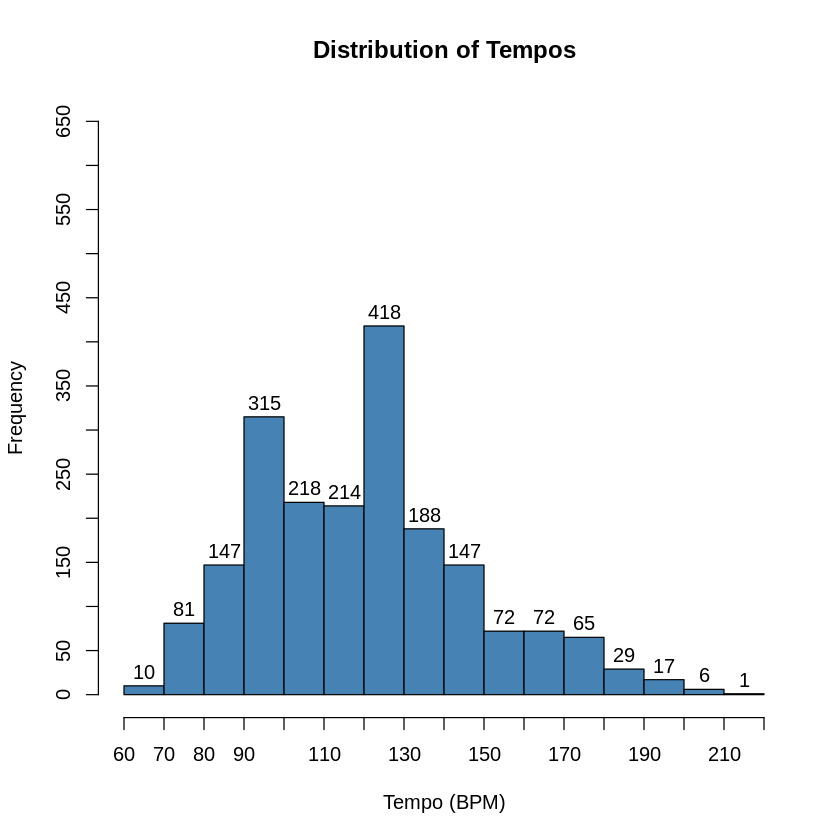

In [ ]:
# create a histogram
hist(hits$tempo,  # vector of tempo measurements
########################################################
# Student To-Do: Adjust breaks
########################################################
     breaks = 20,  # number of bin ranges to use
########################################################
     labels = TRUE,  # add count labels above each bar
     xlab = "Tempo (BPM)",   # x-axis label
     xaxt='n',  # turn off default x-axis ticks
     yaxt='n',  # turn off default y-axis ticks
     ylab = "Frequency",  # y-axis label
     ylim = c(0,650),  # sets window for y-axis
     main = "Distribution of Tempos",  # main label
     col = "steelblue")  # fill color of bars
axis(1, at = seq(60, 220, 10))  # set custom ticks on x-axis
axis(2, at = seq(0, 650, 50))  # set custom ticks on y-axis

### <a name="05sol6">Solution to Question 6</a>

---

Using 20 breaks (each with width 10 beats per minute), we can add up the heights:

- The bin 60-70 bpm has 10 songs.
- The bin 70-80 bpm has 81 songs.
- The bin 80-90 bpm has 147 songs.
  - We can approximate half are between 80 and 85 bpm.
  - Approximately 73 songs are between 80 and 85 bpm.

Thus, there are approximately 164 songs that have a tempo less than 85 bpm.

<br>


In [ ]:
10 + 81 + 73

[1] 164

In [ ]:
# compare to the exact value

sum(hits$tempo < 85)

[1] 171

## <a name="05rel-freq">Relative Frequency Histograms</a>

---

Our initial frequency histogram of tempos in [Question 6](#05q6)
measured the count or frequency of songs that fall in each bin of the
histogram. A <font color="dodgerblue">**relative frequency
histogram**</font> rescales the vertical axis to units **proportion per
unit of $X$**.

-   We can create a relative frequency histogram by adding the option
    `freq = FALSE` in the `hist()` function.



## <a name="05q7">Question 7</a>

---

Based on the relative frequency histogram below, approximate the value
of $P(X < 85)$, the probability that a randomly selected songs has a
tempo less than 85 BPM.

a.  The option `freq = FALSE` is added to the `hist` command below. Run the code cell below and compare the result with the histogram above.
  - **What is different about the two histograms? What is similar? What are the units of the vertical (y) axis?**

b. Using the output from the code cell below, approximate $P(X < 85)$.
  - *Hint: The area of each bar corresponds to the proportion of songs in `hits` that are in the corresponding bin range of tempos.*

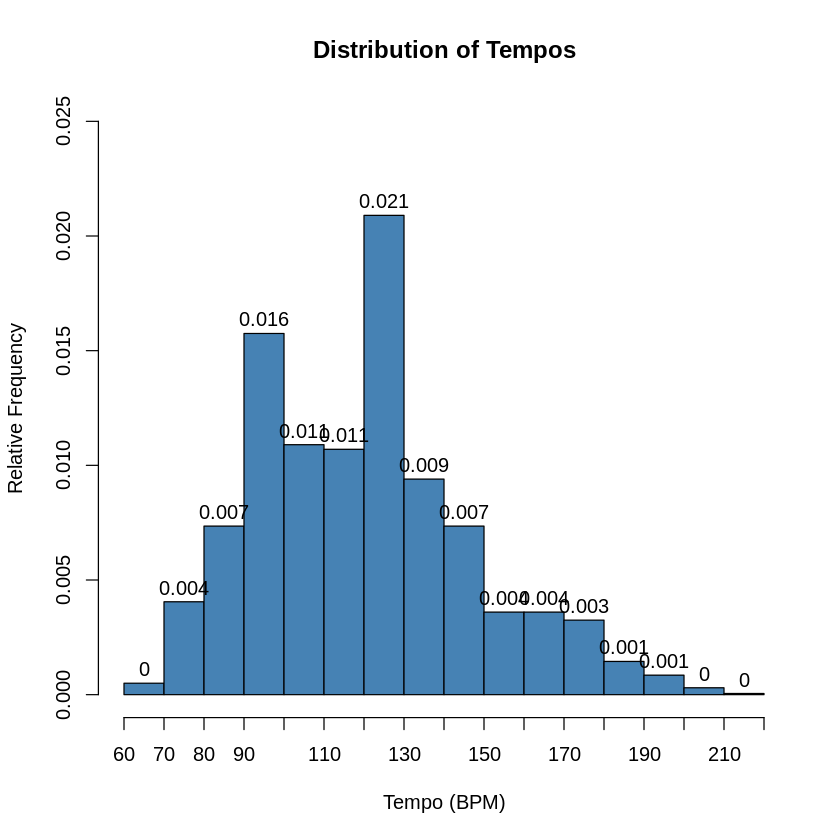

In [ ]:
# create a histogram
hist(hits$tempo,  # vector of tempo measurements
     freq = FALSE,
     breaks = 20,  # number of bin ranges to use
     labels = TRUE,  # add count labels above each bar
     xlab = "Tempo (BPM)",   # x-axis label
     xaxt='n',  # turn off default x-axis ticks
     yaxt='n',  # turn off default y-axis ticks
     ylab = "Relative Frequency",  # y-axis label
     ylim = c(0,0.025),  # sets window for y-axis
     main = "Distribution of Tempos",  # main label
     col = "steelblue")  # fill color of bars
axis(1, at = seq(60, 220, 10))  # set custom ticks on x-axis
axis(2, at = seq(0, 0.025, 0.005))  # set custom ticks on y-axis

### <a name="05q7">Solution to Question 7</a>

---

a. The units on the vertical axis are different. We now have frequencies instead of counts. The shape of the histogram and the horizontal axis (tempo bin ranges) are the same.

b. Using 20 breaks (each with width 10 beats per minute), we can add up the heights:

- There are approximately 0% of the songs are in the bin 60-70.
- There are approximately $(10)(0.004) = 0.04$ or 4% of the songs are in the bin 70-80.
- There are approximately $(10)(0.007)=0.07$ or 7% of the songs are in the bin 80-90.
  - We can approximate half are between 80 and 85 bpm.
  - Approximately 3.5% of the songs are between 80 and 85 bpm.

Approximately 7.5% (or a proportion of $0.075$) of songs have a tempo less than 85 bpm.

<br>




In [ ]:
#we can compare this to the exact value - the # of hits below 85 bpm divided by the total # of observations which gives us 8.55%
mean(hits$tempo < 85)

[1] 0.0855

## <a name="05density">Density Plots</a>

---

A <font color="dodgerblue">**density plot**</font> can informally be
considered as a relative frequency histogram where we choose incredibly
small widths for each bin range. One way to create a density plot in R
is to:

1.  First convert the values of a quantitative variable to densities with the `density()` function.
  -   For more information, see [density help documentation](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/density).
2.  Use the `plot()` function to plot the densities.
  -   For more advanced density plots see <https://r-graph-gallery.com/density-plot.html>.

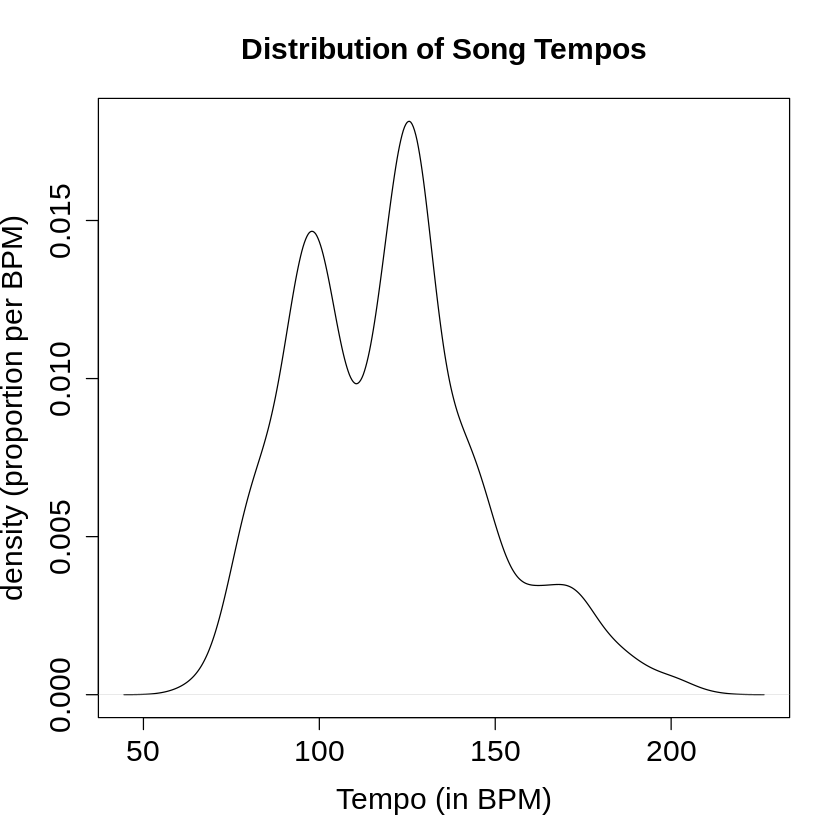

In [ ]:
# approximate densities and then plot
plot(density(hits$tempo),  # convert to density and then plot
     ylab = "density (proportion per BPM)",  # vertical axis label
     xlab = "Tempo (in BPM)",  # horizontal axis label
     main = "Distribution of Song Tempos",  # main title
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels

### <a name="05read-density">Reading a Density Plot</a>

---

If we want to use a density plot compute $P(X < 85)$, the probability
that a random selected song in `hits` has a tempo less than 85 BPM:

-   <font color="dodgerblue">**We approximate the AREA below the density
    curve over the interval from 0 to 85 BPM.**</font>
-   If we have a theoretical model $f(x)$ for the density,
    <font color="dodgerblue">**we can use definite integrals to compute
    these proportions!**</font>
-   Run the code cell below to sketch an area corresponding to $P(X<85)$.
    There is nothing to edit in the code cell.

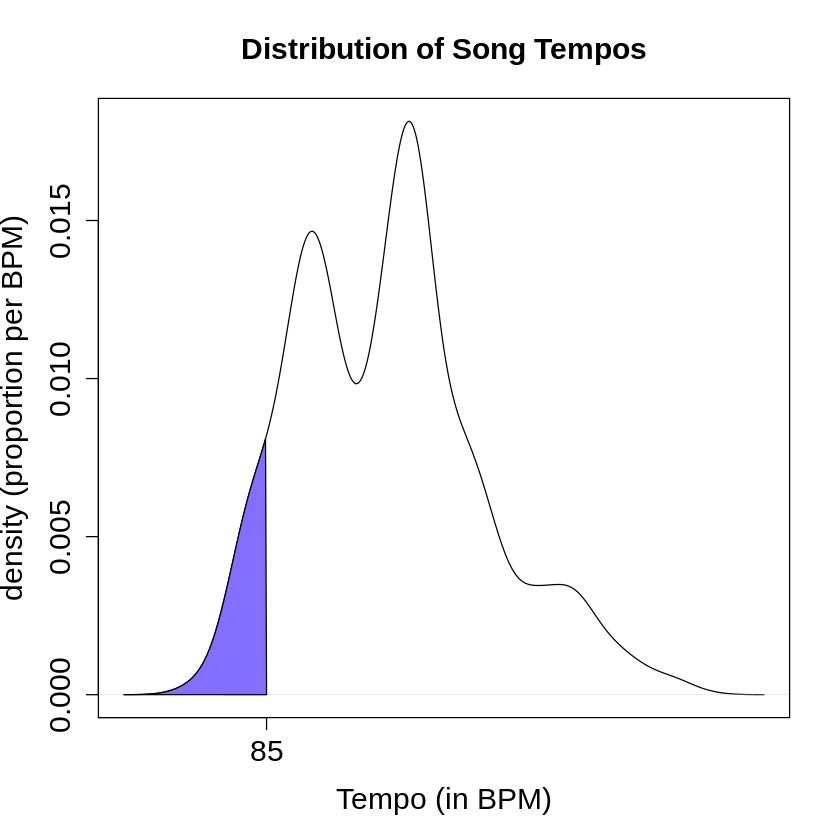

In [ ]:
###############################
# Area representing P(X < 85)
# Run code without editing
##############################
den <- density(hits$tempo)

plot(den,  # plot density of tempo
     ylab = "density (proportion per BPM)",  # vertical axis label
     xlab = "Tempo (in BPM)",  # horizontal axis label
     xaxt = 'n',  # turn off default x-axis ticks
     main = "Distribution of Song Tempos",  # main title
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels


# Fill area from 0 to 85 BPM
value <- 85

polygon(c(den$x[den$x <= value ], value),
        c(den$y[den$x <= value ], 0),
        col = "slateblue1",
        border = 1)
axis(1, at = seq(0, value, value),  # set custom ticks on x-axis
     cex.axis=1.5, cex.main=1.5)  # increase font size on ticks

# <a name="05cont-dist">Continuous Probability Distributions</a>

---



## <a name="05cont-pdf">Probability Density Function (pdf)</a>

---

If $X$ is a **continuous** random variable, the
<font color="dodgerblue">**probability density function (pdf)**</font>, denoted $f(x)$, satisfies the following properties:

-   $f(x) \geq 0$ for all $x$,
-   $\displaystyle \int_{-\infty}^{\infty} f(x) = 1$, and
-   $\displaystyle P(a < x < b) = \int_a^b f(x) \, dx$



## <a name="05cont-cdf">Cumulative Distribution Function (cdf)</a>

---

If $X$ is a **continuous** random variable, the
<font color="dodgerblue">**cumulative distribution function(cdf)**</font>, denoted $F(x)$, is

$$\color{dodgerblue}{F(x) = P(X \leq x) = \int_{-\infty}^x f(t) \, dt}.$$

Thus we have the important relations between a pdf and cdf of a
continuous random variable X:

-   <font color="mediumseagreen">**The cdf $F(x)$ is an antiderivative of the pdf $f$.**</font>
-   <font color="tomato">**The pdf $f(x)$ is the derivative of $F(x)$.**</font>



## <a name="05q8">Question 8</a>

---

The figure below contains 8 plots of either a probability density
function or a cumulative distribution function of a continuous random
variable. Match each probability density function shown in (a)-(d) with
a corresponding graph of a cumulative distribution function (I)-(IV).
Explain how you determined your answers.

<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/6/6e/05fig-match.png"
alt="Image Credit: Adam Spiegler, CC BY-SA 4.0." />
<figcaption aria-hidden="true">
Image Credit: Adam Spiegler, CC BY-SA 4.0
<https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons
</figcaption>
</figure>

### <a name="05sol8">Solution to Question 8</a>

---

| <font size=3>Graph (a)</font> | <font size=3>Graph (b)</font> | <font size=3>Graph (c)</font> | <font size=3>Graph (d)</font> |
|-----------|-----------|-----------|-----------|
| <font size=3>(IV)</font>  | <font size=3>(III)</font> |  <font size=3>(I)</font> |  <font size=3>(II)</font> |

<br> <br> <br>



## <a name="05prop-cont">Properties of Continuous Random Variables</a>

---



## <a name="05q9">Question 9</a>

---

Let $X$ is a continuous random variable with pdf and cdf denoted $f(x)$ and $F(x)$, respectively. Determine if each statement is True or False.

a. $0 \leq f(x) \leq 1$ for all $x$.

b.  $0 \leq F(x) \leq 1$ for all $x$.

c.  $\displaystyle \int_{-\infty}^{\infty} f(x) \, dx= 1$.

d.  $\displaystyle \int_{-\infty}^{\infty} F(x) \, dx = 1$.

e.  $\displaystyle \lim_{x \to \infty} f(x) = 1$.

f.  $\displaystyle \lim_{x \to \infty} F(x) = 1$.

g.  The pdf must be a nondecreasing function.

h.  The cdf must be a nondecreasing function.

### <a name="05sol9">Solution to Question 9</a>

---

List the properties (a)-(h) that are indeed TRUE.


- Properties (b), (c), (f), and (h) are always true.
- Properties (a), (d), (e), and (g) are not always true.

Note property (a) is not always true since for continuous distributions, probabilities are related to areas under the curve as opposed to heights. Here is a counter-example to (a):

$$f(x) = \left\{ \begin{array}{ll} 2 & 0 \leq x \leq 0.5 \\
0 & \mbox{ otherwise} \end{array} \right.$$

With such a probability density function, for example we have:

$$P (X \leq 0.4) = \int_0^{0.4} 2 \, dx = 0.8$$

<br>


## <a name="05q10">Question 10

---

The probability of a Lithium-ion battery failing at time $x$ (in years)
is given by the probability density function below.

$$f(x) = \left\{ \begin{array}{ll}
\frac{1}{3}e^{-\frac{x}{3}} & x \geq 0 \\
0 & \mbox{otherwise}
\end{array} \right.$$



### <a name="05q10a">Question 10a</a>

---

Compute the probability that a Lithium-ion battery lasts more than 2
years.

#### <a name="05sol10a">Solution to Question 10a</a>

---

We are asked to find $P(X > 2)$, we can use the probability of the complement $P(X \leq 2)$ as this avoids evaluating an indefinite integral (upper limit approaches $\infty$). We have:

$$P( X > 2 ) = 1 - P(X \leq 2) = 1 - \int_0^2 \frac{1}{3} e^{-\frac{x}{3}} \, dx .$$

Evaluating the integral, using substitution with $u=-\frac{x}{3}$ and $du = - \frac{1}{3} \, dx$, we have

$$\int_0^2 \frac{1}{3} e^{-\frac{x}{3}} \, dx  = \int_{u=0}^{u=-2/3} -e^u \, du =  -e^u |_{0}^{-2/3} = -e^{-2/3} - (-1) \approx 0.4866$$

Thus, we have

$$P( X > 2 ) = 1 - P(X \leq 2) \approx 1 - 0.4866 = 0.5134.$$

There is a 51.34% chance that a battery will last more than 2 years.

<br>


In [ ]:
int <- -exp(-2/3) + 1
int
1-int

[1] 0.4865829

[1] 0.5134171

### <a name="05q10b">Question 10b</a>

---

What is the value of P(X=2), i.e. the probability that the battery lasts exactly 2 years?

#### <a name="05sol10b">Solution to Question 10b</a>

---


$P(X=2)=0$ since if we could measure time with exact precision, the probability that a battery dies at exactly the instant it is $2.00000000000000000000000000000000000000\ldots$ years old would be 0%.



<br>



# <a name="CC License">Creative Commons License Information</a>
---


![Creative Commons
License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)

*Statistical Methods: Exploring the Uncertain* by [Adam
Spiegler (University of Colorado Denver)](https://github.com/CU-Denver-MathStats-OER/Statistical-Theory)
is licensed under a [Creative Commons
Attribution-NonCommercial-ShareAlike 4.0 International
License](http://creativecommons.org/licenses/by-nc-sa/4.0/). This work is funded by an [Institutional OER Grant from the Colorado Department of Higher Education (CDHE)](https://cdhe.colorado.gov/educators/administration/institutional-groups/open-educational-resources-in-colorado).

For similar interactive OER materials in other courses funded by this project in the Department of Mathematical and Statistical Sciences at the University of Colorado Denver, visit <https://github.com/CU-Denver-MathStats-OER>.